<a href="https://colab.research.google.com/github/egyptai/DecisionTree/blob/main/20210604IrisDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
iris = load_iris()

In [ ]:
trainX, testX, trainY, testY = train_test_split(iris['data'], iris['target'], test_size = 0.2)

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 10)
dt.fit(trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
acc = dt.score(testX, testY)
print('정확도 =', np.round(acc, 4))

정확도 = 0.9667


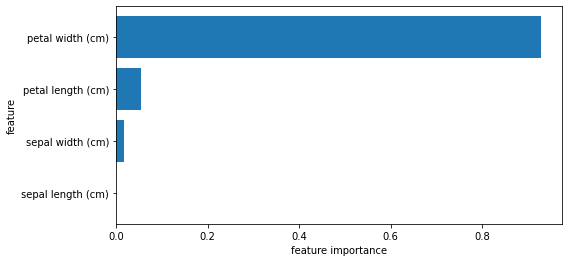

In [ ]:
feat_impo = dt.feature_importances_
feat_name = list(iris['feature_names'])

plt.figure(figsize=(8, 4))
x_idx = np.arange(len(feat_name))
plt.barh(x_idx, feat_impo, align = 'center')
plt.yticks(x_idx, feat_name)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

In [ ]:
testGini = []
testEntropy = []
for k in range(1, 25):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(trainX, trainY)

    testGini.append(dt.score(testX, testY))

    dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    dt.fit(trainX, trainY)

    testEntropy.append(dt.score(testX, testY))

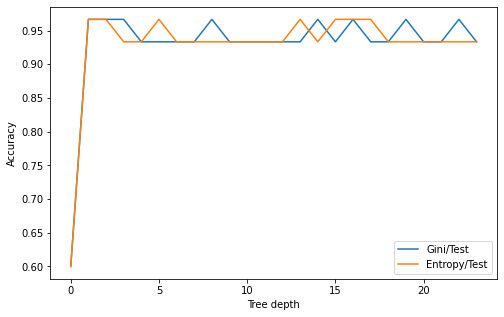

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(testGini, label="Gini/Test")
plt.plot(testEntropy, label="Entropy/Test")
plt.legend()
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.show()